In [3]:
import os
import itertools
from collections import Counter, defaultdict
import numpy as np
import re
from string import punctuation
import nltk
from nltk.corpus import stopwords
from pymorphy3 import MorphAnalyzer
morph = MorphAnalyzer()
from nltk import word_tokenize
from nltk import sent_tokenize
from nltk.probability import FreqDist
from nltk.collocations import *
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer #импорт функции, которая создаст вектора мешка слов
vectorizer = CountVectorizer() #сохраним в переменную
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
stops = stopwords.words('russian') + ['это', 'весь', 'мой', 'ваш', 'свой', 'мочь', 'всё', 'ещё']

def normalize(text):
    normalized_text = [morph.parse(token)[0].normal_form for token in word_tokenize(text.lower()) if len(token) > 2 and morph.parse(token)[0].normal_form not in stops]  
    return normalized_text

КНИГА 1 (УЭЙР. ПО МИЛОСТИ КОРОЛЯ)

In [26]:
with open('C:\\Users\\Диана\\Desktop\\Профпереподготовка\\Программирование\\Для_проекта\\Ueyr_Po_milosti_korolya.txt', 'r', encoding = 'utf-8') as txt:
    text1 = txt.read()
    text1 = re.sub(r'\n', ' ', text1)
    text1 = re.sub(r'[a-zA-Z…]',  '', text1)
    text1_sent = sent_tokenize(text1) # предложения
    text1_sent_clean = [] # для чистых предложений
    for sent in text1_sent: # цикл по каждому предложению
        text1_sent_clean.append(' '.join(normalize(sent))) #предобработка

In [30]:
text1_clean = ' '.join(text1_sent_clean)

In [6]:
total_words = len(text1_clean.split())
print(total_words)
uniq = len(set(text1_clean))
ttr = (uniq / total_words) * 100
print(ttr)

106594
0.04690695536334128


In [7]:
text_tokens = word_tokenize(text1_clean)
word_frequencies = FreqDist(text_tokens)
print(word_frequencies)
word_frequencies.most_common(30)

<FreqDist with 11984 samples and 106594 outcomes>


[('гарри', 3503),
 ('король', 1438),
 ('который', 1019),
 ('анна', 673),
 ('кейт', 611),
 ('сказать', 530),
 ('человек', 505),
 ('королева', 456),
 ('милость', 433),
 ('стать', 418),
 ('уолси', 410),
 ('двор', 345),
 ('дело', 334),
 ('рука', 328),
 ('время', 326),
 ('день', 321),
 ('год', 321),
 ('большой', 301),
 ('сын', 297),
 ('знать', 293),
 ('сделать', 287),
 ('должный', 275),
 ('отец', 274),
 ('мария', 267),
 ('сирый', 265),
 ('новый', 257),
 ('друг', 241),
 ('хотеть', 241),
 ('глаз', 235),
 ('англия', 232)]

<Axes: title={'center': '20 самых частотных слов в книге Уэйр "По милости короля"'}, xlabel='Samples', ylabel='Counts'>

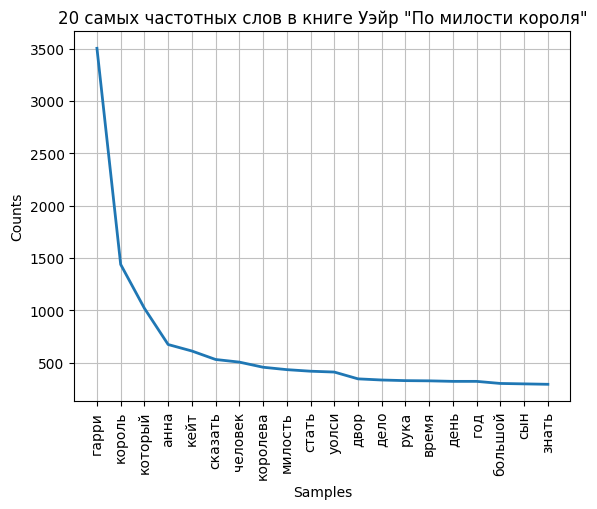

In [8]:
word_frequencies.plot(20, title='20 самых частотных слов в книге Уэйр "По милости короля"')

In [8]:
count = 0
for i in text1_clean.split():
    if i == 'кромвель':
        count += 1
print(count)
kromwel_otn = (count / total_words) * 100
print(kromwel_otn)

182
0.17074131752256225


In [7]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder_big = BigramCollocationFinder.from_words(word_tokenize(text1_clean))

In [8]:
text = text1_clean
tagged_tuples = ['_'.join((str(morph.parse(token)[0].normal_form), str(morph.parse(token)[0].tag.POS))) for token in word_tokenize(text)]
tagged_text = ' '.join(tagged_tuples)

In [9]:
finder_big = BigramCollocationFinder.from_words(word_tokenize(tagged_text))
scores_student_t = finder_big.score_ngrams(bigram_measures.student_t)

In [10]:
bigrams_with_krom = []
for bigram_measured in scores_student_t:
    #print(bigram_measured)
    #print(bigram_measured[0][0])
    if re.match(r'кромвель', bigram_measured[0][1]) or re.match(r'кромвель', bigram_measured[0][0]):
        # с падежами например \w+_NOUN_gen, с конкретным словом например r'друг'
        #print(bigram_measured[0][0])
        #print(bigram_measured)
        bigrams_with_krom.append(bigram_measured)
print(bigrams_with_krom[:30])

[(('сказать_INFN', 'кромвель_NOUN'), 2.5084864146065278), (('произнести_INFN', 'кромвель_NOUN'), 2.3728144066940313), (('продолжить_INFN', 'кромвель_NOUN'), 2.2001797934002467), (('милорд_NOUN', 'кромвель_NOUN'), 1.9376794191042648), (('кромвель_NOUN', 'прийти_INFN'), 1.882188490909432), (('сообщить_INFN', 'кромвель_NOUN'), 1.6581176483437954), (('кромвель_NOUN', 'милость_NOUN'), 1.6303450475636527), (('милость_NOUN', 'кромвель_NOUN'), 1.6303450475636527), (('анна_NOUN', 'кромвель_NOUN'), 1.4254554665365782), (('день_NOUN', 'кромвель_NOUN'), 1.4156168860855263), (('кромвель_NOUN', 'лукаво_ADVB'), 1.410591592069627), (('вставить_INFN', 'кромвель_NOUN'), 1.4093842686351379), (('отчитываться_INFN', 'кромвель_NOUN'), 1.4093842686351379), (('утешить_INFN', 'кромвель_NOUN'), 1.3948963874212663), (('кромвель_NOUN', 'избавиться_INFN'), 1.390067093683309), (('кромвель_NOUN', 'стремиться_INFN'), 1.3671279484280126), (('поверить_INFN', 'кромвель_NOUN'), 1.3671279484280126), (('следить_INFN', 'кро

In [13]:
bigrams_with_adj = []
for bigram_measured in scores_student_t:
    #print(bigram_measured)
    #print(bigram_measured[0][0])
    if re.match(r'\кромвель', bigram_measured[0][1]) and re.match(r'\w+_ADJ', bigram_measured[0][0]):
        # с падежами например \w+_NOUN_gen, с конкретным словом например r'друг'
        #print(bigram_measured[0][0])
        #print(bigram_measured)
        bigrams_with_adj.append(bigram_measured)
print(bigrams_with_adj[:10])

[(('отчий_ADJF', 'кромвель_NOUN'), 0.9743888023716156), (('недовольный_ADJF', 'кромвель_NOUN'), 0.9573146706193595), (('каждый_ADJF', 'кромвель_NOUN'), 0.8446254010544684)]


In [15]:
bigrams_with_adj = []
for bigram_measured in scores_student_t:
    #print(bigram_measured)
    #print(bigram_measured[0][0])
    if re.match(r'\кромвель', bigram_measured[0][0]) and re.match(r'\w+_ADJ', bigram_measured[0][1]):
        # с падежами например \w+_NOUN_gen, с конкретным словом например r'друг'
        #print(bigram_measured[0][0])
        #print(bigram_measured)
        bigrams_with_adj.append(bigram_measured)
print(bigrams_with_adj[:20])

[(('кромвель_NOUN', 'следующий_ADJF'), 1.3043471298345692), (('кромвель_NOUN', 'разношёрстный_ADJF'), 0.9982925868247744), (('кромвель_NOUN', 'свинячий_ADJF'), 0.9982925868247744), (('кромвель_NOUN', 'трудолюбивый_ADJF'), 0.9982925868247744), (('кромвель_NOUN', 'суетливый_ADJF'), 0.9948777604743231), (('кромвель_NOUN', 'ранний_ADJF'), 0.9419479520423288), (('кромвель_NOUN', 'роскошный_ADJF'), 0.9351182993414263), (('кромвель_NOUN', 'большой_ADJF'), 0.4860686342570877), (('кромвель_NOUN', 'который_ADJF'), 0.18395098262850593)]


In [11]:
finder_big_win = BigramCollocationFinder.from_words(word_tokenize(text1_clean), window_size=4)

In [16]:
scores_tscore_no_win = finder_big.score_ngrams(bigram_measures.student_t)
scores_tscore_win = finder_big_win.score_ngrams(bigram_measures.student_t)
print(scores_tscore_no_win[:10])

[(('сказать_INFN', 'гарри_NOUN'), 9.468463999108574), (('друг_NOUN', 'друг_NOUN'), 7.410502043978135), (('человек_NOUN', 'который_ADJF'), 6.910400950943409), (('святой_ADJF', 'георгий_NOUN'), 6.847100628677933), (('личный_ADJF', 'покой_NOUN'), 6.611538693369049), (('сей_ADJF', 'пора_NOUN'), 5.9955594748922705), (('золотой_ADJF', 'парча_NOUN'), 5.821781191660202), (('гарри_NOUN', 'понимать_INFN'), 5.777407475047395), (('ответить_INFN', 'гарри_NOUN'), 5.730251496691564), (('сэр_NOUN', 'томас_NOUN'), 5.723904050858726)]


In [20]:
print(scores_tscore_win[:30])

[(('сказать', 'гарри'), 4.795744188098462), (('друг', 'друг'), 4.233894766580092), (('святой', 'георгий'), 3.9432981153817024), (('человек', 'который'), 3.8724912531748257), (('личный', 'покой'), 3.792104071072035), (('взять', 'рука'), 3.7115967888190378), (('золотой', 'парча'), 3.5907202759776964), (('глава', 'год'), 3.4913350592583368), (('сей', 'пора'), 3.456410400038882), (('гарри', 'понимать'), 3.404568046988277), (('гарри', 'знать'), 3.386387441089289), (('каждый', 'день'), 3.384993134766917), (('сэр', 'томас'), 3.3809058909387595), (('год', 'назад'), 3.266685930864993), (('следующий', 'день'), 3.233998677380363), (('королевский', 'часовня'), 3.1875549166577613), (('молодой', 'человек'), 3.067170305682575), (('христианский', 'мир'), 2.929618378736244), (('ответить', 'гарри'), 2.8911182310102066), (('проводить', 'время'), 2.876394113699892), (('леди', 'солсбери'), 2.868643409104078), (('клясться', 'святой'), 2.8054879794908936), (('поездка', 'страна'), 2.7003774661760187), (('засе

КНИГА 2 (ШЕКСПИР)

In [11]:
with open('C:\\Users\\Диана\\Desktop\\Профпереподготовка\\Программирование\\Для_проекта\\Shekspir_Genrih-VIII.txt', 'r', encoding = 'utf-8') as txt:
    text2 = txt.read()
    text2 = re.sub(r'\n', ' ', text2)
    text2 = re.sub(r'[a-zA-Z…]',  '', text2)
    text2_sent = sent_tokenize(text2) # предложения
    text2_sent_clean = [] # для чистых предложений
    for sent in text2_sent: # цикл по каждому предложению
        text2_sent_clean.append(' '.join(normalize(sent))) #предобработка

In [12]:
text2_clean = ' '.join(text2_sent_clean)

In [6]:
total_words = len(text2_clean.split())
print(total_words)
uniq = len(set(text2_clean))
ttr = (uniq / total_words) * 100
print(ttr)

11386
0.41278763393641316


In [23]:
text_tokens = word_tokenize(text2_clean)
word_frequencies = FreqDist(text_tokens)
print(word_frequencies)
word_frequencies.most_common(30)

<FreqDist with 3676 samples and 11386 outcomes>


[('король', 226),
 ('вулси', 104),
 ('генрих', 99),
 ('королева', 97),
 ('дворянин', 91),
 ('екатерина', 67),
 ('пусть', 66),
 ('кардинал', 65),
 ('норфолк', 65),
 ('сказать', 64),
 ('милорд', 62),
 ('дать', 61),
 ('сэр', 60),
 ('знать', 59),
 ('дело', 54),
 ('входить', 49),
 ('бекингем', 48),
 ('первый', 48),
 ('герцог', 46),
 ('кромвель', 44),
 ('сеффолкнуть', 42),
 ('второй', 42),
 ('уходить', 41),
 ('говорить', 41),
 ('камергер', 41),
 ('ловести', 39),
 ('друг', 38),
 ('который', 37),
 ('просить', 37),
 ('кранмера', 36)]

<Axes: title={'center': '20 самых частотных слов в книге Шекспира "Генрих VIII'}, xlabel='Samples', ylabel='Counts'>

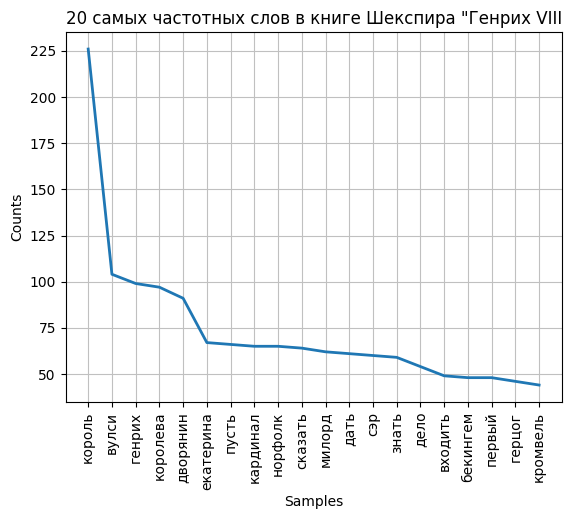

In [24]:
word_frequencies.plot(20, title='20 самых частотных слов в книге Шекспира "Генрих VIII')

In [25]:
count = 0
for i in text2_clean.split():
    if i == 'кромвель':
        count += 1
print(count)
kromwel_otn = (count / total_words) * 100
print(kromwel_otn)

44
0.38643948708940806


In [13]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder_big = BigramCollocationFinder.from_words(word_tokenize(text2_clean))

In [14]:
text = text2_clean
tagged_tuples = ['_'.join((str(morph.parse(token)[0].normal_form), str(morph.parse(token)[0].tag.POS))) for token in word_tokenize(text)]
tagged_text = ' '.join(tagged_tuples)

In [15]:
finder_big = BigramCollocationFinder.from_words(word_tokenize(tagged_text))
scores_student_t = finder_big.score_ngrams(bigram_measures.student_t)

In [16]:
bigrams_with_krom = []
for bigram_measured in scores_student_t:
    #print(bigram_measured)
    #print(bigram_measured[0][0])
    if re.match(r'кромвель', bigram_measured[0][1]) or re.match(r'кромвель', bigram_measured[0][0]):
        # с падежами например \w+_NOUN_gen, с конкретным словом например r'друг'
        #print(bigram_measured[0][0])
        #print(bigram_measured)
        bigrams_with_krom.append(bigram_measured)
print(bigrams_with_krom[:30])

[(('новость_NOUN', 'кромвель_NOUN'), 1.3978183234627446), (('кромвель_NOUN', 'кромвель_NOUN'), 1.2939818103638594), (('кромвель_NOUN', 'милорд_NOUN'), 1.2447960936328086), (('кромвель_NOUN', 'норфолк_NOUN'), 1.2365984741776332), (('вулси_NOUN', 'кромвель_NOUN'), 1.1300294212603563), (('кромвель_NOUN', 'заклинать_INFN'), 0.9961356051291059), (('кромвель_NOUN', 'нижний_ADJF'), 0.9961356051291059), (('кромвель_NOUN', 'останавливаться_INFN'), 0.9961356051291059), (('кромвель_NOUN', 'падший_ADJF'), 0.9961356051291059), (('кромвель_NOUN', 'покидать_INFN'), 0.9961356051291059), (('кромвель_NOUN', 'почему_ADVB'), 0.9961356051291059), (('кромвель_NOUN', 'служащий_ADJF'), 0.9961356051291059), (('слез.31_None', 'кромвель_NOUN'), 0.9961356051291059), (('смущение_NOUN', 'кромвель_NOUN'), 0.9961356051291059), (('спасаться_INFN', 'кромвель_NOUN'), 0.9961356051291059), (('кромвель_NOUN', 'вполовину_ADVB'), 0.9922712102582119), (('кромвель_NOUN', 'забытый_ADJF'), 0.9922712102582119), (('кромвель_NOUN',

In [30]:
bigrams_with_adj = []
for bigram_measured in scores_student_t:
    #print(bigram_measured)
    #print(bigram_measured[0][0])
    if re.match(r'\кромвель', bigram_measured[0][1]) and re.match(r'\w+_ADJ', bigram_measured[0][0]):
        # с падежами например \w+_NOUN_gen, с конкретным словом например r'друг'
        #print(bigram_measured[0][0])
        #print(bigram_measured)
        bigrams_with_adj.append(bigram_measured)
print(bigrams_with_adj[:10])

[(('грешный_ADJF', 'кромвель_NOUN'), 0.9884068153873178), (('счастливый_ADJF', 'кромвель_NOUN'), 0.9729492359037415), (('милый_ADJF', 'кромвель_NOUN'), 0.9690848410328473), (('который_ADJF', 'кромвель_NOUN'), 0.857017389776919)]


In [32]:
bigrams_with_adj = []
for bigram_measured in scores_student_t:
    #print(bigram_measured)
    #print(bigram_measured[0][0])
    if re.match(r'\кромвель', bigram_measured[0][0]) and re.match(r'\w+_ADJ', bigram_measured[0][1]):
        # с падежами например \w+_NOUN_gen, с конкретным словом например r'друг'
        #print(bigram_measured[0][0])
        #print(bigram_measured)
        bigrams_with_adj.append(bigram_measured)
print(bigrams_with_adj[:20])

[(('кромвель_NOUN', 'нижний_ADJF'), 0.9961356051291059), (('кромвель_NOUN', 'падший_ADJF'), 0.9961356051291059), (('кромвель_NOUN', 'служащий_ADJF'), 0.9961356051291059), (('кромвель_NOUN', 'забытый_ADJF'), 0.9922712102582119), (('кромвель_NOUN', 'ужасный_ADJF'), 0.9922712102582119), (('кромвель_NOUN', 'последний_ADJF'), 0.9690848410328473), (('кромвель_NOUN', 'рад_ADJS'), 0.9420340769365888), (('кромвель_NOUN', 'который_ADJF'), 0.857017389776919), (('кромвель_NOUN', 'первый_ADJF'), 0.8145090461970841)]


In [26]:
finder_big_win = BigramCollocationFinder.from_words(word_tokenize(text2_clean), window_size=4)

In [27]:
scores_tscore_no_win = finder_big.score_ngrams(bigram_measures.student_t)
scores_tscore_win = finder_big_win.score_ngrams(bigram_measures.student_t)
print(scores_tscore_no_win[:10])

[(('король_NOUN', 'генрих_NOUN'), 9.492680820016266), (('королева_NOUN', 'екатерина_NOUN'), 6.234305704521571), (('второй_ADJF', 'дворянин_NOUN'), 6.027577835982299), (('первый_ADJF', 'дворянин_NOUN'), 5.677781406311919), (('анна_NOUN', 'буллен_NOUN'), 5.08403435308249), (('сэр_NOUN', 'томас_NOUN'), 4.443856156232675), (('пожилой_ADJF', 'леди_NOUN'), 4.2318347342011), (('томас_NOUN', 'ловесть_NOUN'), 3.58275137279111), (('уходить_INFN', 'сцена_NOUN'), 3.434995778626702), (('третий_ADJF', 'дворянин_NOUN'), 3.287707665089379)]


In [28]:
print(scores_tscore_win[:30])

[(('король', 'генрих'), 5.340661805795301), (('королева', 'екатерина'), 3.5424466538393453), (('второй', 'дворянин'), 3.464709441505644), (('первый', 'дворянин'), 3.3033351792974037), (('анна', 'буллен'), 2.9179652294125433), (('сэр', 'томас'), 2.53300684917951), (('пожилой', 'леди'), 2.498394214492757), (('томас', 'ловести'), 2.2738047401195502), (('уходить', 'сцена'), 2.113573727392223), (('герцог', 'сеффолкнуть'), 2.081699365973741), (('дворянин', 'дворянин'), 1.9944723762166563), (('герцог', 'норфолк'), 1.955515504153325), (('сэр', 'ловести'), 1.89724222729668), (('кардинал', 'вулси'), 1.8854118443813521), (('третий', 'дворянин'), 1.8647682853430936), (('дворянин', 'второй'), 1.8321623045845776), (('дворянин', 'первый'), 1.7145104948343461), (('норфолк', 'сеффолкнуть'), 1.6944154415238277), (('кардинал', 'кампейус'), 1.659539751452492), (('герцог', 'бекингем'), 1.6200896803625984), (('предстать', 'суд'), 1.615244795108604), (('воля', 'король'), 1.5143148110907243), (('сцена', 'двор

КНИГА 3 (ХАРПЕР. ПОСЛЕДНЯЯ ИЗ БОЛЕЙН)

In [17]:
with open('C:\\Users\\Диана\\Desktop\\Профпереподготовка\\Программирование\\Для_проекта\\Harper_Poslednyaya-iz-roda-Boleyn.txt', 'r', encoding = 'utf-8') as file:
    text3 = file.read()
    text3 = re.sub(r'\n', ' ', text3)
    text3 = re.sub(r'[a-zA-Z…]',  '', text3)
    text3_sent = sent_tokenize(text3) # предложения
    text3_sent_clean = [] # для чистых предложений
    for sent in text3_sent: # цикл по каждому предложению
        text3_sent_clean.append(' '.join(normalize(sent))) #предобработка

In [18]:
text3_clean = ' '.join(text3_sent_clean)

In [39]:
total_words = len(text3_clean.split())
print(total_words)
uniq = len(set(text3_clean))
ttr = (uniq / total_words) * 100
print(ttr)

94561
0.04864584765389537


In [40]:
text_tokens = word_tokenize(text3_clean)
word_frequencies = FreqDist(text_tokens)
print(word_frequencies)
word_frequencies.most_common(30)

<FreqDist with 11230 samples and 94561 outcomes>


[('мария', 2605),
 ('король', 1080),
 ('отец', 684),
 ('который', 666),
 ('анна', 636),
 ('рука', 534),
 ('стаффа', 503),
 ('глаз', 490),
 ('сказать', 474),
 ('величество', 465),
 ('стать', 424),
 ('вилла', 397),
 ('королева', 372),
 ('двор', 354),
 ('время', 313),
 ('говорить', 299),
 ('знать', 297),
 ('лицо', 277),
 ('твой', 261),
 ('видеть', 252),
 ('хотеть', 252),
 ('сестра', 249),
 ('снова', 247),
 ('голова', 243),
 ('буллен', 240),
 ('голос', 234),
 ('стафф', 232),
 ('дверь', 231),
 ('стаффорд', 229),
 ('джордж', 222)]

<Axes: title={'center': '20 самых частотных слов в книге Харпер "Последняя из рода Болейн"'}, xlabel='Samples', ylabel='Counts'>

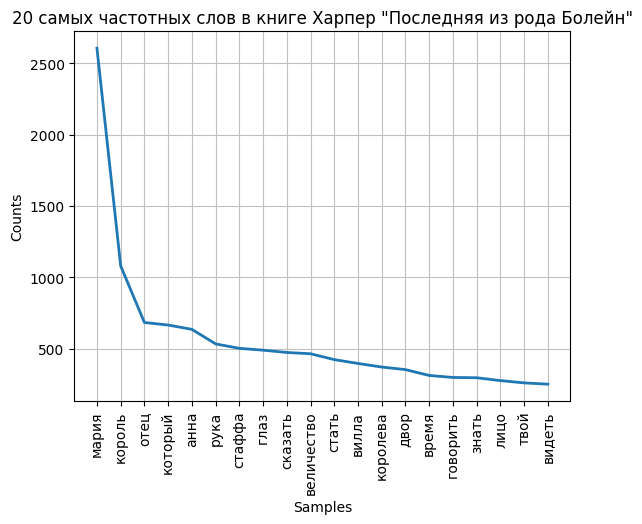

In [41]:
word_frequencies.plot(20, title='20 самых частотных слов в книге Харпер "Последняя из рода Болейн"')

In [42]:
count = 0
for i in text3_clean.split():
    if i == 'кромвель':
        count += 1
print(count)
kromwel_otn = (count / total_words) * 100
print(kromwel_otn)

106
0.11209695328941106


In [19]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder_big = BigramCollocationFinder.from_words(word_tokenize(text3_clean))

In [20]:
text = text3_clean
tagged_tuples = ['_'.join((str(morph.parse(token)[0].normal_form), str(morph.parse(token)[0].tag.POS))) for token in word_tokenize(text)]
tagged_text = ' '.join(tagged_tuples)

In [21]:
finder_big = BigramCollocationFinder.from_words(word_tokenize(tagged_text))
scores_student_t = finder_big.score_ngrams(bigram_measures.student_t)

In [22]:
bigrams_with_krom = []
for bigram_measured in scores_student_t:
    #print(bigram_measured)
    #print(bigram_measured[0][0])
    if re.match(r'кромвель', bigram_measured[0][1]) or re.match(r'кромвель', bigram_measured[0][0]):
        # с падежами например \w+_NOUN_gen, с конкретным словом например r'друг'
        #print(bigram_measured[0][0])
        #print(bigram_measured)
        bigrams_with_krom.append(bigram_measured)
print(bigrams_with_krom[:30])

[(('мастер_NOUN', 'кромвель_NOUN'), 4.881589397538645), (('томас_NOUN', 'кромвель_NOUN'), 1.6621540649193407), (('сказать_INFN', 'кромвель_NOUN'), 1.4252817703848), (('кромвель_NOUN', 'застылый_ADJF'), 1.397568014050623), (('вслед_PREP', 'кромвель_NOUN'), 1.3959827237341973), (('кромвель_NOUN', 'спокойно_ADVB'), 1.3904342076267067), (('кромвель_NOUN', 'показать_INFN'), 1.385678336677429), (('кромвель_NOUN', 'собираться_INFN'), 1.360313691614615), (('ребёнок_NOUN', 'кромвель_NOUN'), 1.3341564013935878), (('кромвель_NOUN', 'кромвель_NOUN'), 1.3301931756025231), (('год_NOUN', 'кромвель_NOUN'), 1.2422095630408865), (('время_NOUN', 'кромвель_NOUN'), 1.166115627852444), (('кромвель_NOUN', 'стать_INFN'), 1.0781320152908074), (('кромвель_NOUN', 'сказать_INFN'), 1.0384997573801604), (('король_NOUN', 'кромвель_NOUN'), 1.033083381073511), (('кромвель_NOUN', '131_None'), 0.9988790304671059), (('кромвель_NOUN', 'двуликий_ADJF'), 0.9988790304671059), (('кромвель_NOUN', 'допрашивать_INFN'), 0.9988790

In [25]:
bigrams_with_adj = []
for bigram_measured in scores_student_t:
    #print(bigram_measured)
    #print(bigram_measured[0][0])
    if re.match(r'\кромвель', bigram_measured[0][0]) and re.match(r'\w+_INFN', bigram_measured[0][1]):
        # с падежами например \w+_NOUN_gen, с конкретным словом например r'друг'
        #print(bigram_measured[0][0])
        #print(bigram_measured)
        bigrams_with_adj.append(bigram_measured)
print(bigrams_with_adj[:30])

[(('кромвель_NOUN', 'показать_INFN'), 1.385678336677429), (('кромвель_NOUN', 'собираться_INFN'), 1.360313691614615), (('кромвель_NOUN', 'стать_INFN'), 1.0781320152908074), (('кромвель_NOUN', 'сказать_INFN'), 1.0384997573801604), (('кромвель_NOUN', 'допрашивать_INFN'), 0.9988790304671059), (('кромвель_NOUN', 'нашёптывать_INFN'), 0.9988790304671059), (('кромвель_NOUN', 'проложить_INFN'), 0.9988790304671059), (('кромвель_NOUN', 'слать_INFN'), 0.9988790304671059), (('кромвель_NOUN', 'торопить_INFN'), 0.9988790304671059), (('кромвель_NOUN', 'переписываться_INFN'), 0.9977580609342118), (('кромвель_NOUN', 'познакомить_INFN'), 0.9977580609342118), (('кромвель_NOUN', 'проскользнуть_INFN'), 0.9977580609342118), (('кромвель_NOUN', 'затвориться_INFN'), 0.9966370914013176), (('кромвель_NOUN', 'сочувствовать_INFN'), 0.9966370914013176), (('кромвель_NOUN', 'воротиться_INFN'), 0.9943951523355294), (('кромвель_NOUN', 'доходить_INFN'), 0.9943951523355294), (('кромвель_NOUN', 'испортить_INFN'), 0.9943951

In [49]:
bigrams_with_adj = []
for bigram_measured in scores_student_t:
    #print(bigram_measured)
    #print(bigram_measured[0][0])
    if re.match(r'\кромвель', bigram_measured[0][0]) and re.match(r'\w+_ADJ', bigram_measured[0][1]):
        # с падежами например \w+_NOUN_gen, с конкретным словом например r'друг'
        #print(bigram_measured[0][0])
        #print(bigram_measured)
        bigrams_with_adj.append(bigram_measured)
print(bigrams_with_adj[:20])

[(('кромвель_NOUN', 'застылый_ADJF'), 1.397568014050623), (('кромвель_NOUN', 'двуликий_ADJF'), 0.9988790304671059), (('кромвель_NOUN', 'родный_ADJF'), 0.9876693351381648), (('кромвель_NOUN', 'необходимый_ADJF'), 0.9798225484079061), (('кромвель_NOUN', 'простой_ADJF'), 0.9798225484079061), (('кромвель_NOUN', 'учтивый_ADJF'), 0.9775806093421178), (('кромвель_NOUN', 'драгоценный_ADJF'), 0.9708547921447531), (('кромвель_NOUN', 'подобный_ADJF'), 0.9506773405526592), (('кромвель_NOUN', 'чёрный_ADJF'), 0.919290193631624), (('кромвель_NOUN', 'собственный_ADJF'), 0.9114434069013653), (('кромвель_NOUN', 'должный_ADJF'), 0.7713222152896014)]


In [37]:
finder_big_win = BigramCollocationFinder.from_words(word_tokenize(text3_clean), window_size=3)

In [38]:
scores_tscore_no_win = finder_big.score_ngrams(bigram_measures.student_t)
scores_tscore_win = finder_big_win.score_ngrams(bigram_measures.student_t)
print(scores_tscore_no_win[:10])

[(('вильям_NOUN', 'стаффорд_NOUN'), 8.806808167948452), (('вилла_NOUN', 'кэри_NOUN'), 8.014225710406663), (('друг_NOUN', 'друг_NOUN'), 7.295969410297651), (('король_NOUN', 'генрих_NOUN'), 6.8615530720202935), (('мария_NOUN', 'буллен_NOUN'), 6.59980186418965), (('джейн_NOUN', 'рочфорд_NOUN'), 6.543440284113265), (('мария_NOUN', 'тюдора_NOUN'), 6.5159360473284815), (('томас_NOUN', 'буллен_NOUN'), 6.360315638664301), (('последний_ADJF', 'время_NOUN'), 6.179804379534998), (('генрих_NOUN', 'тюдора_NOUN'), 5.616614421590178)]


In [39]:
print(scores_tscore_win[:30])

[(('вильям', 'стаффорд'), 6.209709553932454), (('вилла', 'кэри'), 5.424495700993963), (('друг', 'друг'), 5.218594541948929), (('король', 'генрих'), 4.653948944212836), (('джейн', 'рочфорд'), 4.617012746623586), (('томас', 'буллен'), 4.467152068104039), (('мария', 'тюдора'), 4.443277123345808), (('последний', 'время'), 4.323682733187119), (('мария', 'буллен'), 4.21409505813375), (('хотеть', 'сказать'), 4.0074781768706496), (('взять', 'рука'), 3.886849991352499), (('подумать', 'мария'), 3.82512116177451), (('леди', 'анна'), 3.8213243242167136), (('лорд', 'стаффорд'), 3.745561091774862), (('сей', 'пора'), 3.731666285895562), (('твой', 'отец'), 3.665216750457856), (('генрих', 'тюдора'), 3.6283992696131473), (('протянуть', 'рука'), 3.6112192902292657), (('мастер', 'кромвель'), 3.511437493123064), (('королева', 'клод'), 3.4732230231557866), (('королева', 'екатерина'), 3.408455309013726), (('крайний', 'мера'), 3.3136403187600827), (('франсуаза', 'фуа'), 3.3135637938473823), (('мария', 'почувс

КНИГА 4 (ГРЕГОРИ. ЕЩЁ ОДНА)

In [34]:
with open('C:\\Users\\Диана\\Desktop\\Профпереподготовка\\Программирование\\Для_проекта\\Gregori_3_Eshche_odna_iz_roda_Boleyn.txt', 'r', encoding = 'utf-8') as file:
    text4 = file.read()
    text4 = re.sub(r'\n', ' ', text4)
    text4 = re.sub(r'[a-zA-Z…]',  '', text4)
    text4_sent = sent_tokenize(text4) # предложения
    text4_sent_clean = [] # для чистых предложений
    for sent in text4_sent: # цикл по каждому предложению
        text4_sent_clean.append(' '.join(normalize(sent))) #предобработка

In [35]:
text4_clean = ' '.join(text4_sent_clean)

In [57]:
total_words = len(text4_clean.split())
print(total_words)
uniq = len(set(text4_clean))
ttr = (uniq / total_words) * 100
print(ttr)

94184
0.050964070330417055


In [58]:
text_tokens = word_tokenize(text4_clean)
word_frequencies = FreqDist(text_tokens)
print(word_frequencies)
word_frequencies.most_common(30)

<FreqDist with 10926 samples and 94184 outcomes>


[('анна', 1468),
 ('король', 1212),
 ('королева', 816),
 ('джордж', 686),
 ('знать', 539),
 ('генрих', 534),
 ('сказать', 509),
 ('рука', 486),
 ('глаз', 405),
 ('голова', 389),
 ('двор', 386),
 ('уильям', 378),
 ('сестра', 350),
 ('хотеть', 343),
 ('лицо', 312),
 ('большой', 305),
 ('хороший', 305),
 ('ребёнок', 301),
 ('брат', 296),
 ('говорить', 292),
 ('дело', 282),
 ('день', 279),
 ('дверь', 275),
 ('думать', 267),
 ('просто', 262),
 ('время', 260),
 ('мария', 258),
 ('придворный', 256),
 ('комната', 255),
 ('который', 244)]

<Axes: title={'center': '20 самых частотных слов в книге Грегори "Ещё одна из рода Болейн"'}, xlabel='Samples', ylabel='Counts'>

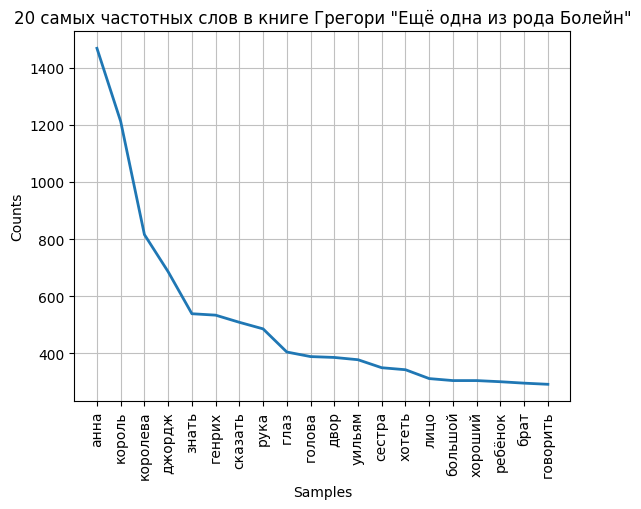

In [28]:
word_frequencies.plot(20, title='20 самых частотных слов в книге Грегори "Ещё одна из рода Болейн"')

In [59]:
count = 0
for i in text4_clean.split():
    if i == 'кромвель':
        count += 1
print(count)
kromwel_otn = (count / total_words) * 100
print(kromwel_otn)

9
0.009555763186953198


In [36]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder_big = BigramCollocationFinder.from_words(word_tokenize(text4_clean))

In [37]:
text = text4_clean
tagged_tuples = ['_'.join((str(morph.parse(token)[0].normal_form), str(morph.parse(token)[0].tag.POS))) for token in word_tokenize(text)]
tagged_text = ' '.join(tagged_tuples)

In [38]:
finder_big = BigramCollocationFinder.from_words(word_tokenize(tagged_text))
scores_student_t = finder_big.score_ngrams(bigram_measures.student_t)

In [39]:
bigrams_with_krom = []
for bigram_measured in scores_student_t:
    #print(bigram_measured)
    #print(bigram_measured[0][0])
    if re.match(r'кромвель', bigram_measured[0][1]) or re.match(r'кромвель', bigram_measured[0][0]):
        # с падежами например \w+_NOUN_gen, с конкретным словом например r'друг'
        #print(bigram_measured[0][0])
        #print(bigram_measured)
        bigrams_with_krom.append(bigram_measured)
print(bigrams_with_krom[:30])

[(('секретарь_NOUN', 'кромвель_NOUN'), 2.2352560187293986), (('кромвель_NOUN', 'лорд-казначей_NOUN'), 0.9999044423681305), (('заседать_INFN', 'кромвель_NOUN'), 0.9996177694725219), (('кромвель_NOUN', 'уняться_INFN'), 0.9996177694725219), (('кромвель_NOUN', 'открыто_ADVB'), 0.9988533084175656), (('кромвель_NOUN', 'прислать_INFN'), 0.9970377134120445), (('кромвель_NOUN', 'отказаться_INFN'), 0.9967510405164359), (('томас_NOUN', 'кромвель_NOUN'), 0.9956043489340015), (('значит_CONJ', 'кромвель_NOUN'), 0.9933109657691328), (('кромвель_NOUN', 'пора_NOUN'), 0.9909220249723945), (('кромвель_NOUN', 'дворец_NOUN'), 0.9908264673405249), (('кромвель_NOUN', 'дядюшка_NOUN'), 0.9849018941646139), (('кромвель_NOUN', 'который_ADJF'), 0.9766839378238342), (('думать_INFN', 'кромвель_NOUN'), 0.9744861122908349)]


In [64]:
bigrams_with_adj = []
for bigram_measured in scores_student_t:
    #print(bigram_measured)
    #print(bigram_measured[0][0])
    if re.match(r'\кромвель', bigram_measured[0][1]) and re.match(r'\w+_ADJ', bigram_measured[0][0]):
        # с падежами например \w+_NOUN_gen, с конкретным словом например r'друг'
        #print(bigram_measured[0][0])
        #print(bigram_measured)
        bigrams_with_adj.append(bigram_measured)
print(bigrams_with_adj[:10])

[]


In [65]:
bigrams_with_adj = []
for bigram_measured in scores_student_t:
    #print(bigram_measured)
    #print(bigram_measured[0][0])
    if re.match(r'\кромвель', bigram_measured[0][0]) and re.match(r'\w+_ADJ', bigram_measured[0][1]):
        # с падежами например \w+_NOUN_gen, с конкретным словом например r'друг'
        #print(bigram_measured[0][0])
        #print(bigram_measured)
        bigrams_with_adj.append(bigram_measured)
print(bigrams_with_adj[:10])

[(('кромвель_NOUN', 'который_ADJF'), 0.9766839378238342)]


In [52]:
finder_big_win = BigramCollocationFinder.from_words(word_tokenize(text4_clean), window_size=4)

In [53]:
scores_tscore_no_win = finder_big.score_ngrams(bigram_measures.student_t)
scores_tscore_win = finder_big_win.score_ngrams(bigram_measures.student_t)
print(scores_tscore_no_win[:10])

[(('придворный_NOUN', 'дама_NOUN'), 9.117107495280601), (('покачать_INFN', 'голова_NOUN'), 8.565355447080705), (('друг_NOUN', 'друг_NOUN'), 7.885339866993514), (('королева_NOUN', 'екатерина_NOUN'), 6.653087710853629), (('каждый_ADJF', 'день_NOUN'), 6.547059350037443), (('генрих_NOUN', 'перси_NOUN'), 6.49691448031329), (('протянуть_INFN', 'рука_NOUN'), 6.263363918021536), (('уильям_NOUN', 'стаффорд_NOUN'), 6.209008947606904), (('джейн_NOUN', 'паркер_NOUN'), 6.153321822215536), (('взять_INFN', 'рука_NOUN'), 6.121882393522394)]


In [54]:
print(scores_tscore_win[:30])

[(('придворный', 'дама'), 5.303397659159491), (('покачать', 'голова'), 4.902521202063058), (('друг', 'друг'), 4.566223039831242), (('взять', 'рука'), 3.851209187388724), (('каждый', 'день'), 3.8136711687805334), (('генрих', 'перси'), 3.770508674301903), (('королева', 'екатерина'), 3.7496931295202516), (('уильям', 'стаффорд'), 3.6360500077001348), (('протянуть', 'рука'), 3.592159382890227), (('джейн', 'паркер'), 3.5398138633787393), (('джейн', 'сеймур'), 3.41870265041319), (('выйти', 'замуж'), 3.3908445051432032), (('принцесса', 'мария'), 3.3330452421375814), (('фрэнсис', 'уэстон'), 3.3092233821686188), (('пожать', 'плечо'), 3.251074277277664), (('кардинал', 'уолси'), 3.2437986810453565), (('сэр', 'фрэнсис'), 3.189394948812963), (('дядя', 'говард'), 3.075975119421577), (('придворный', 'дать'), 2.9744953163312107), (('вернуться', 'двор'), 2.943251051738684), (('обращать', 'внимание'), 2.936703501385341), (('леди', 'кэри'), 2.926651933940252), (('королева', 'англия'), 2.873377205845291), 

НЕ ПОНАДОБИЛОСЬ ДЛЯ ПРОЕКТА

In [48]:
corpus = []

for i in os.listdir('Для_проекта'):
  with open('C:\\Users\\Диана\\Desktop\\Профпереподготовка\\Программирование\\Для_проекта\\' + i, encoding='utf-8') as file:
    text = file.read()
    corpus.append(text)

len(corpus)

4

In [60]:
corpus[3][:200]



'Annotation\n\n\nФигура этого правителя чрезвычайно противоречива. Для своих современников Генрих VIII из династии Тюдоров был великим королем. Монарх-идеалист, он расширил парламент, основал Королевский '

ВЕКТОРЫ

In [37]:
texts = (text1_clean, text2_clean, text3_clean, text4_clean)

In [41]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 1)) #ngram_range=(1, 1) означает униграммы, (1, 2) - униграммы и биграммы, (2, 2) - биграммы и т.д.
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)

In [43]:
npm_tfidf = tfidf_matrix.todense()
document_1_vector = npm_tfidf[0] #вектор первого текста
document_2_vector = npm_tfidf[1] #вектор второго текста
document_3_vector = npm_tfidf[2] #вектор первого текста
document_4_vector = npm_tfidf[3] #вектор второго текста
print(tfidf_vectorizer.get_feature_names_out()) #токены вектора
print(document_1_vector)
print(document_2_vector)
print(document_3_vector)
print(document_4_vector)

['10' '100' '101' ... 'ящичек' 'ёкнуть' 'ёрзать']
[[0.         0.         0.         ... 0.         0.         0.00054092]]
[[0.00348758 0.         0.         ... 0.         0.         0.        ]]
[[0.         0.00045371 0.00045371 ... 0.00071542 0.00272228 0.        ]]
[[0.         0.         0.         ... 0.00041844 0.         0.00083687]]


In [46]:
X = tfidf_vectorizer.fit_transform(texts) #полученные tf-idf вектора 

In [47]:
text_vector = pd.DataFrame(columns = tfidf_vectorizer.get_feature_names_out(), data = X.toarray()) 
text_vector 

,10,100,101,102,103,104,105,106,107,108,...,яство,ястреб,ястребиный,ячменный,ячмень,яшма,ящик,ящичек,ёкнуть,ёрзать
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000438,0.000000,0.000000,0.000000,0.000000,0.000343,0.000438,0.000000,0.000000,0.000541
1,0.003488,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000454,0.000454,0.000454,0.000454,0.000454,0.000454,0.000454,0.000454,0.000454,...,0.000869,0.000000,0.000358,0.000000,0.000000,0.000000,0.000579,0.000715,0.002722,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000678,0.000531,0.001255,0.000531,0.001061,0.000000,0.000339,0.000418,0.000000,0.000837


In [48]:
print(text_vector['кромвель'])

0    0.032581
1    0.080078
2    0.025097
3    0.002493
Name: кромвель, dtype: float64


In [54]:
lemmas = list(text_vector.columns)
tf_idf = text_vector.loc[0].tolist()
lemmas_tf_idf = list(zip(lemmas, tf_idf))
sorted_chapter_one = sorted(lemmas_tf_idf, key=lambda x: x[1], reverse = 'True')
sorted_chapter_one[:20]

[('гарри', 0.7670243359287582),
 ('король', 0.2581409098487614),
 ('кейт', 0.2096014030513968),
 ('который', 0.18241718941462406),
 ('анна', 0.12047769232192541),
 ('сказать', 0.09487842040211066),
 ('человек', 0.09040302321333185),
 ('уолси', 0.0897744726608024),
 ('королева', 0.0819892764984277),
 ('милость', 0.0775138793096489),
 ('стать', 0.0748286409963816),
 ('двор', 0.0617604812051475),
 ('дело', 0.05979130644208482),
 ('рука', 0.05871721111677791),
 ('время', 0.05835917934167561),
 ('сирый', 0.05802496403686009),
 ('год', 0.057464099903919846),
 ('день', 0.057464099903919846),
 ('большой', 0.053883782152896804),
 ('сын', 0.0531677186026922)]